In [29]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
#panda data frame containing every infos
col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_of_the_land",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]
df_final  = pd.DataFrame(columns = col_names)

In [31]:
#def save_df():
    #global df_final
    #df.to_csv('all_infos.csv')

In [32]:
def create_df():
    # List all files in the directory
    global df_final
    df_final  = pd.DataFrame(columns = col_names)
    
    path = "./all_csv"
    files = os.listdir(path)

    for file in files:
        if os.path.isfile(os.path.join(path, file)):
            file_path = "./all_csv/" + file
            file_df = pd.read_csv(file_path)
            #print(file_df)
            with warnings.catch_warnings():   #warnings from panda because columns with only bool
                warnings.simplefilter("ignore")
                df_final = pd.concat([df_final, file_df])

In [33]:
#TO GET ALL UNIQUE VALUES!!!!!!!!!!!!
def get_info(col_names):
    all_unique = df_final[col_names].unique()
    return all_unique 

In [34]:
#dropna = drop where there is a nan
def clean_df():
    """
    #modify a collumn
    def add_two(x):
        return x + 2
    # We add 2 to col1 and assign the value to col3
    df["col2"] = df["col1"].apply(add_two)

    """
    global df_final
    create_df()
    
    del df_final['Surface_of_the_land']
    #drop the duplicates
    duplicates = df_final.duplicated(keep='first')
    df_final = df_final[~duplicates]
    print("num_duplicates", duplicates.sum())
    #if a line is full of nan, drop it
    df_final = df_final.dropna(how='all')
    print("final shape:", df_final.shape)
    #Fill NaN with 0
    df_final = df_final.fillna(0)
    #Using dictionnaries to map string values to numbers (starting from 1)
    df_final = df_final.replace({"Type_of_property":{"APARTMENT": 1, "APARTMENT_GROUP": 2, "HOUSE": 3, "HOUSE_GROUP": 4}})
    df_final = df_final.replace({"Subtype_of_property":{"PENTHOUSE": 1,"APARTMENT": 2, "DUPLEX": 3, "GROUND_FLOOR": 4, "FLAT_STUDIO": 5,"LOFT": 6, "TRIPLEX": 7, "SERVICE_FLAT": 8, "APARTMENT_GROUP": 9, "KOT": 10, "HOUSE": 11, "HOUSE_GROUP": 12, "APARTMENT_BLOCK": 13, "VILLA": 14, "MANSION": 15, "MIXED_USE_BUILDING": 16, "EXCEPTIONAL_PROPERTY": 17, "COUNTRY_COTTAGE": 18, "BUNGALOW": 19, "TOWN_HOUSE": 20, "FARMHOUSE": 21, "CHALET": 22, "CASTLE": 23, "OTHER_PROPERTY": 24, "MANOR_HOUSE": 25}})    
    df_final = df_final.replace({"Type_of_sale":{"residential_sale": 1, "group_sale": 2, "first_session_with_reserve_price": 3, "annuity_monthly_amount": 4, "annuity_without_lump_sum": 5}})
    df_final = df_final.replace({"Fully_equipped_kitchen":{"NOT_INSTALLED": 0, "USA_HYPER_EQUIPPED": 1, "INSTALLED": 2, "HYPER_EQUIPPED": 3, "SEMI_EQUIPPED": 4, "USA_INSTALLED": 5, "USA_SEMI_EQUIPPED": 6, "USA_UNINSTALLED": 7}})
    df_final = df_final.replace({"Furnished": {False: 0, True: 1}})
    df_final = df_final.replace({"Open_fire": {False: 0, True: 1}})
    df_final = df_final.replace({"Terrace": {False: 0, True: 1}})
    df_final = df_final.replace({"Garden": {False: 0, True: 1}})
    df_final = df_final.replace({"Swimming_pool": {False: 0, True: 1}})
    df_final = df_final.replace({"State_of_the_building":{"AS_NEW": 1, "JUST_RENOVATED": 2, "TO_RESTORE": 3, "GOOD": 4, "TO_RENOVATE": 5, "TO_BE_DONE_UP": 6}})
    #Convert some "Numbers of" columns to int type
    df_final = df_final.astype({"Number_of_rooms": int, "Number_of_facades": int})



In [35]:
clean_df()

EmptyDataError: No columns to parse from file

In [ ]:
all_unique = get_info("Number_of_facades")
print(all_unique)
#type property = 1,2,3

In [36]:
df_final["Price"].describe()

count      22933.0
unique      1696.0
top       299000.0
freq         369.0
Name: Price, dtype: float64

In [37]:
df_final

,Locality,Type_of_property,Subtype_of_property,Price,Type_of_sale,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_of_the_land,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building,Unnamed: 0
0,1130,APARTMENT,PENTHOUSE,450000,residential_sale,3,156.0,USA_HYPER_EQUIPPED,False,False,True,43.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0
1,1140,APARTMENT,PENTHOUSE,450000,residential_sale,3,156.0,USA_HYPER_EQUIPPED,False,False,True,43.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0
2,1140,APARTMENT,PENTHOUSE,450000,residential_sale,3,156.0,USA_HYPER_EQUIPPED,False,False,True,43.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,2.0
3,1180,APARTMENT,APARTMENT,485000,residential_sale,2,107.0,USA_HYPER_EQUIPPED,False,False,True,17.0,NaN,NaN,NaN,NaN,NaN,False,AS_NEW,3.0
4,1000,APARTMENT,DUPLEX,460000,residential_sale,3,147.0,USA_HYPER_EQUIPPED,False,False,True,52.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,9255,HOUSE,OTHER_PROPERTY,275000,residential_sale,0,120.0,NaN,False,False,NaN,NaN,NaN,NaN,NaN,120.0,3.0,False,GOOD,51.0
52,4671,HOUSE,HOUSE,299000,residential_sale,3,186.0,INSTALLED,False,False,True,42.0,NaN,NaN,NaN,1000.0,4.0,NaN,NaN,52.0
53,2200,HOUSE,HOUSE,389000,residential_sale,3,126.0,HYPER_EQUIPPED,NaN,False,True,NaN,True,252.0,NaN,561.0,4.0,NaN,NaN,53.0
54,1982,HOUSE,COUNTRY_COTTAGE,769000,residential_sale,6,283.0,INSTALLED,False,False,True,NaN,NaN,NaN,NaN,1251.0,4.0,NaN,NaN,54.0


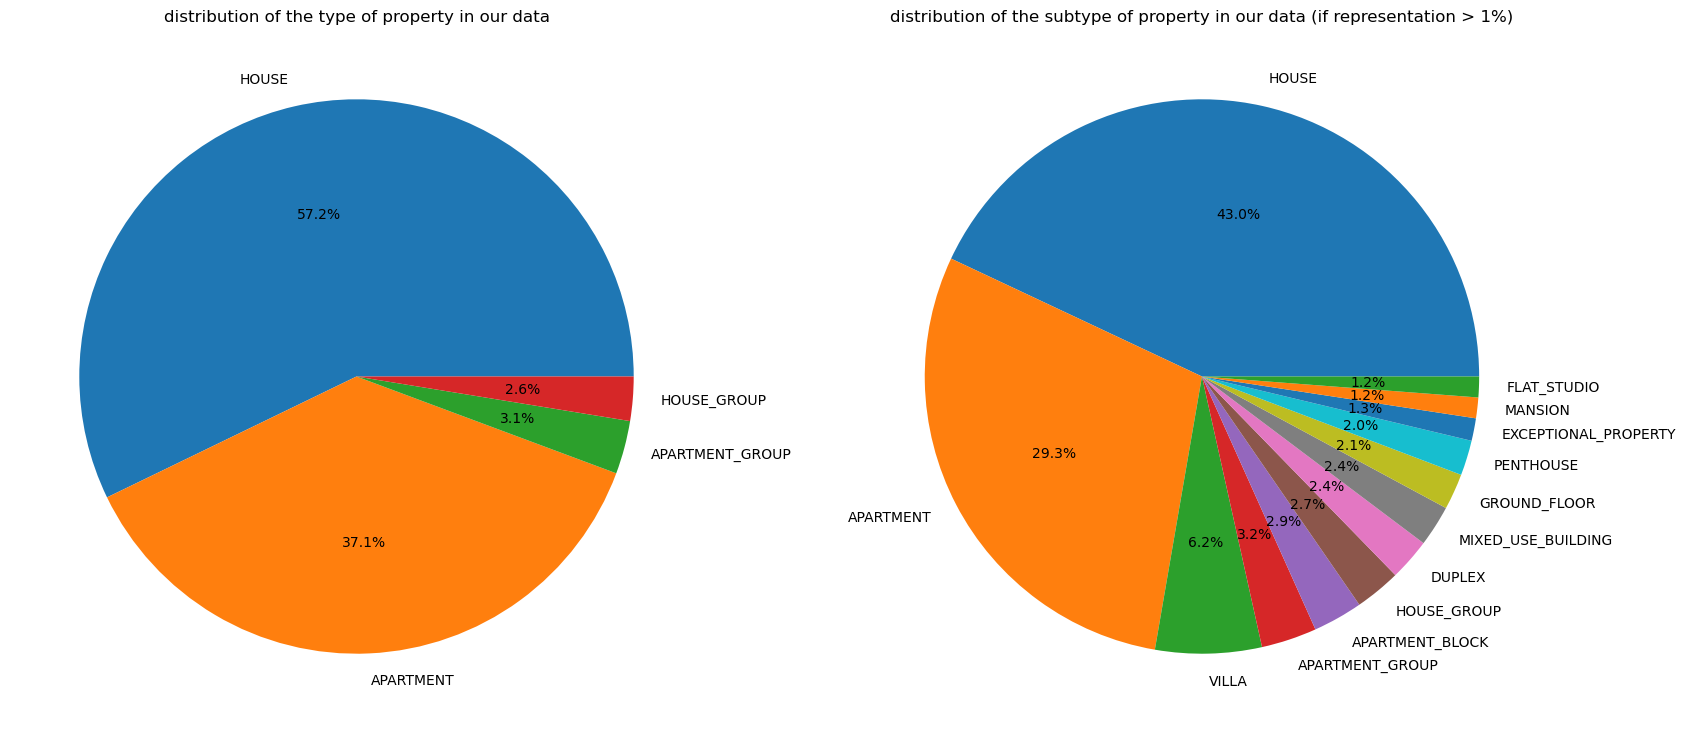

In [38]:
"""
"Locality","Type_of_property", "Subtype_of_property", "Price","Type_of_sale","Number_of_rooms","Living_Area","Fully_equipped_kitchen","Furnished",
"Open_fire","Terrace","Terrace_Area","Garden","Garden_Area","Surface_of_the_land","Surface_area_of_the_plot_of_land","Number_of_facades","Swimming_pool",
"State_of_the_building"
"""
freq_type = df_final["Type_of_property"].value_counts()
freq_subtype = df_final["Subtype_of_property"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(20, 9))

ax[0].pie(freq_type, labels=freq_type.index, autopct='%1.1f%%')
ax[0].set_title("distribution of the type of property in our data")

# Filter out values that are less than 1% of the total
threshold = freq_subtype.sum() * 0.01
freq_subtype = freq_subtype[freq_subtype >= threshold]
ax[1].pie(freq_subtype, labels=freq_subtype.index, autopct='%1.1f%%')#, autopct='%1.1f%%'
#ax[1].bar( freq_subtype.index, freq_subtype)#, autopct='%1.1f%%'
#plt.xticks(rotation=90, fontsize=13)
ax[1].set_title("distribution of the subtype of property in our data (if representation > 1%)")

#plt.xticks(rotation=90, fontsize=13)

plt.show()
#analyse_df_visual()

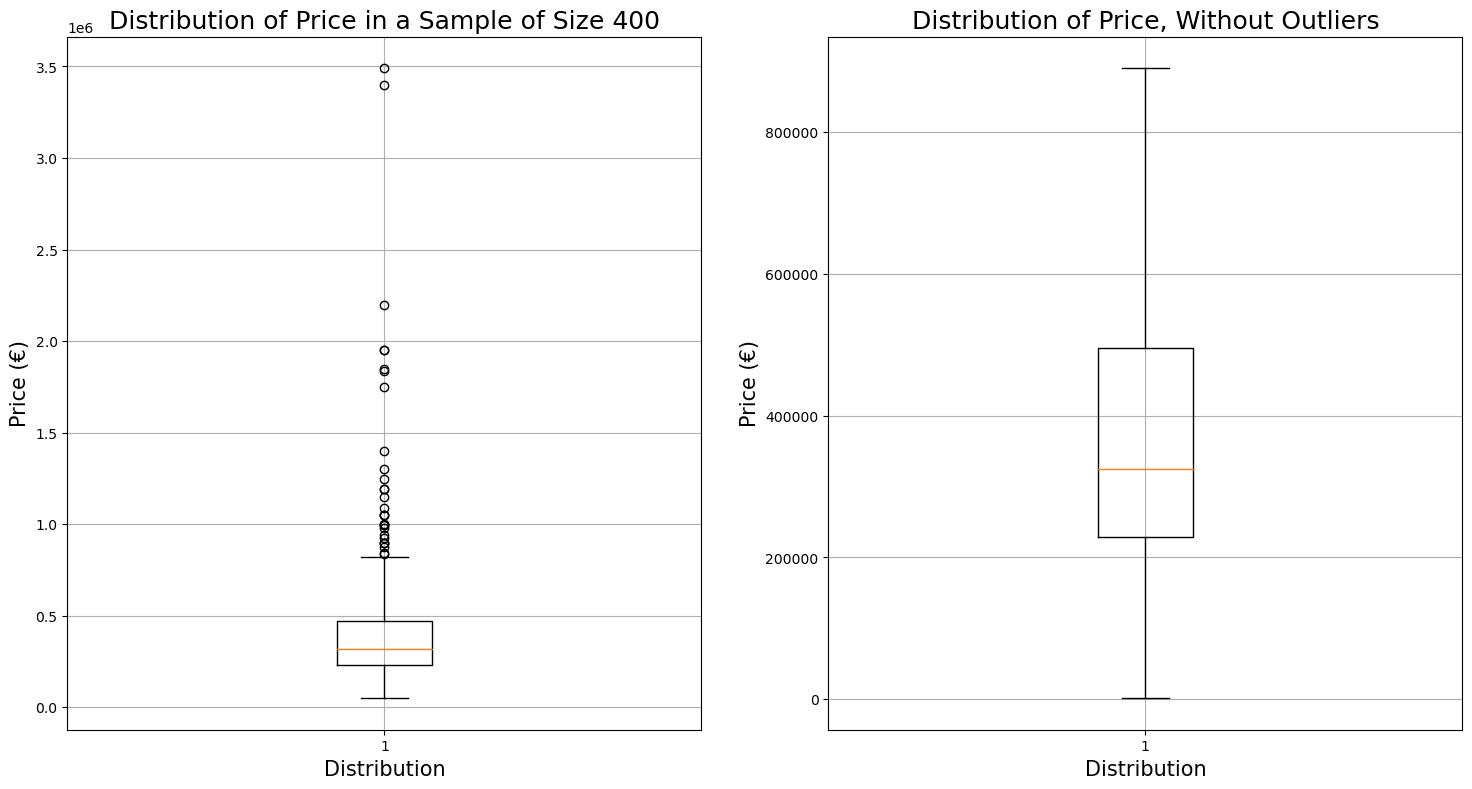

In [39]:
import matplotlib.pyplot as plt

# Drop missing values from the 'Price' column
Price_dropna = df_final['Price'].dropna()

# Take a sample of size 400 from the 'Price' column
len_sample = 400
sample = Price_dropna.sample(n = len_sample)

fig, ax = plt.subplots(1, 2, figsize=(18, 9))

ax[0].boxplot(sample)
ax[0].set_xlabel('Distribution', fontsize=15)
ax[0].set_ylabel("Price (€)", fontsize=15)

ax[0].set_title('Distribution of Price in a Sample of Size {}'.format(len_sample), fontsize=18)
ax[0].grid(True)

ax[1].boxplot(Price_dropna, showfliers=False)
ax[1].set_xlabel('Distribution', fontsize=15)
ax[1].set_ylabel("Price (€)", fontsize=15)

ax[1].set_title('Distribution of Price, Without Outliers', fontsize=18)
ax[1].grid(True)

plt.show()